In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Single Variable Polynomial Regression

In [2]:
x_trai= np.arange(0, 20, 1)
y_trai=1+x_trai**2
X=x_trai**2

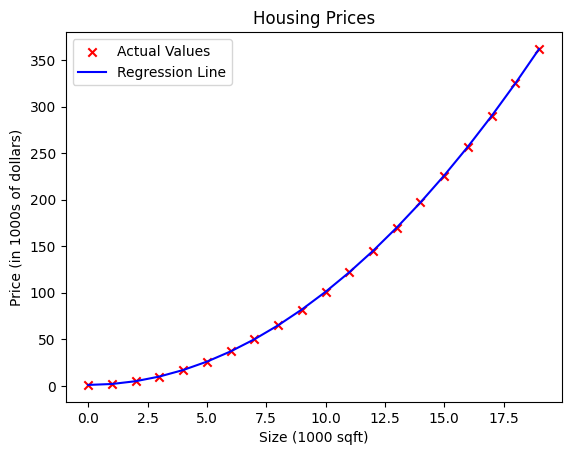

In [3]:

def data(x,y):
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    b1_num=np.sum((x-x_mean)*(y-y_mean))
    b1_den=np.sum((x-x_mean)**2)
    b1=b1_num/b1_den
    b0=y_mean-(b1*x_mean)
    return b0,b1

b0, b1 = data(X, y_trai)
x = np.linspace(min(x_trai), max(x_trai), 100)
y_pred=b0+(b1*X)


# scatter is used to marks the points
plt.scatter(x_trai, y_trai, marker='x', c='r',label='Actual Values')
plt.plot(x_trai, y_pred, color='blue', label='Regression Line')
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Single Variable Polynomial Regerssion (Gradient Descent)

In [4]:
def cost (x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f=w*x[i]+b
        cost=cost+(f-y[i])**2
    total_cost=cost/(2*m)
    return total_cost

In [5]:
def descent(x,y,w,b):
    m = x.shape[0]
    dw=0
    db=0
    for i in range(m):
        f=w*x[i]+b
        dw+=(f-y[i])*x[i]
        db+=f-y[i]
    dwj=dw/m
    dbj=db/m
    return dwj,dbj

In [6]:
def gradient(x, y, a, max_iters):
    J_history=[]
    p_history=[]
    w, b = 0, 0 
    for i in range(max_iters):
        dwj, dwb = descent(x, y, w, b)
        temp_w = w - (a * dwj)
        temp_b = b - (a * dwb)
        w, b = temp_w, temp_b 
        if i < 100_000:  # prevent resource exhaustion  
            J_history.append(cost(x, y, w, b))  
            p_history.append([w, b]) 
            
        if i% math.ceil(max_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ", # 0.2e means till 2 decimal places
                  f"dwj: {dwj: 0.3e}, dwb: {dwb: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
       
    return w, b, J_history, p_history

In [19]:
a=0.00001  
m=1000
x_train = (X - np.mean(X)) / np.std(X)
y_train = (y_trai - np.mean(y_trai)) / np.std(y_trai)
w,b,j,p = gradient(X ,y_train,a,m)
print(w,b)

Iteration    0: Cost 3.89e-01  dwj: -1.135e+02, dwb:  2.220e-17   w:  1.135e-03, b:-2.22045e-22
Iteration  100: Cost 2.71e-01  dwj: -2.186e-03, dwb:  4.980e-01   w:  4.036e-03, b:-4.85377e-04
Iteration  200: Cost 2.71e-01  dwj: -2.185e-03, dwb:  4.978e-01   w:  4.038e-03, b:-9.83254e-04
Iteration  300: Cost 2.70e-01  dwj: -2.184e-03, dwb:  4.975e-01   w:  4.041e-03, b:-1.48090e-03
Iteration  400: Cost 2.70e-01  dwj: -2.183e-03, dwb:  4.973e-01   w:  4.043e-03, b:-1.97832e-03
Iteration  500: Cost 2.70e-01  dwj: -2.182e-03, dwb:  4.971e-01   w:  4.045e-03, b:-2.47552e-03
Iteration  600: Cost 2.70e-01  dwj: -2.181e-03, dwb:  4.969e-01   w:  4.047e-03, b:-2.97248e-03
Iteration  700: Cost 2.69e-01  dwj: -2.180e-03, dwb:  4.966e-01   w:  4.049e-03, b:-3.46922e-03
Iteration  800: Cost 2.69e-01  dwj: -2.179e-03, dwb:  4.964e-01   w:  4.052e-03, b:-3.96573e-03
Iteration  900: Cost 2.69e-01  dwj: -2.178e-03, dwb:  4.962e-01   w:  4.054e-03, b:-4.46201e-03
0.004055842906820306 -0.0049531081221974

Enter house size 150


House price is nan


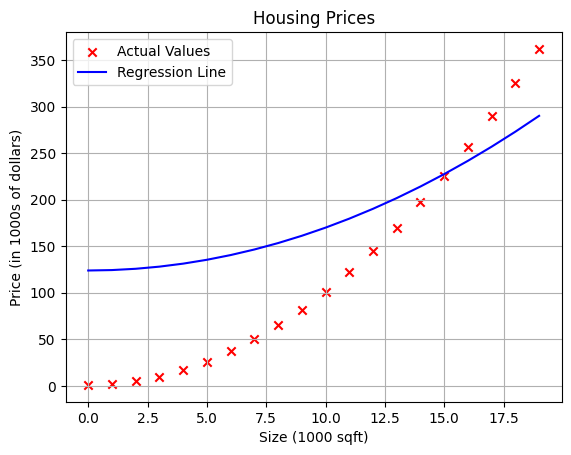

In [20]:
y_pred=(w*X)+b
y_pred_original_scale = y_pred * np.std(y_trai) + np.mean(y_trai)
size=int(input("Enter house size"))
#size_scale=(size - np.mean(x_trai)) / np.std(x_trai)
#price=(w*size_scale)+b
price_actual=price * np.std(y_trai) + np.mean(y_trai)
print("House price is",price_actual)


plt.scatter(x_trai, y_trai, marker='x', c='r',label='Actual Values')
#plt.scatter(size,price_actual,marker='o',c='g',label="Customer Data")
plt.plot(x_trai, y_pred_original_scale, c='b', label="Regression Line")
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.grid()
plt.legend()
plt.show()